In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
analysis = pd.read_csv('analysis_with_regions.csv')
analysis = analysis.set_index(['lon','lat','year'])
analysis

tasmax_num_days  tasmax_pct_days  tasmax_max_temp  \
lon     lat    year                                                            
-122.75  42.25 2006-01-01               13         0.035592       310.828217   
               2007-01-01               14         0.038330       310.177887   
               2008-01-01                3         0.008214       307.915619   
               2009-01-01               17         0.046543       316.693970   
               2010-01-01               13         0.035592       312.144409   
...                                    ...              ...              ...   
 144.75 -6.25  2094-01-01                9         0.024641       316.924896   
               2095-01-01                6         0.016427       316.329315   
               2096-01-01               10         0.027379       318.168640   
               2097-01-01                6         0.016427       315.393127   
               2098-01-01               35         0.095825       322.137512   

                           tasmin_num_days  tasmin_pct_days  tasmin_max_temp  \
lon     lat    year                                                            
-122.75  42.25 2006-01-01               12         0.032854       294.072998   
               2007-01-01               12         0.032854       289.881714   
               2008-01-01                4         0.010951       288.854095   
               2009-01-01               13         0.035592       295.634766   
               2010-01-01               12         0.032854       292.761444   
...                                    ...              ...              ...   
 144.75 -6.25  2094-01-01              305         0.835044       296.912415   
               2095-01-01              302         0.826831       296.972382   
               2096-01-01              256         0.700890       296.531097   
               2097-01-01              297         0.813142       295.959137   
               2098-01-01              258         0.706366       297.205872   

                                     region  
lon     lat    year                          
-122.75  42.25 2006-01-01  Northern America  
               2007-01-01  Northern America  
               2008-01-01  Northern America  
               2009-01-01  Northern America  
               2010-01-01  Northern America  
...                                     ...  
 144.75 -6.25  2094-01-01         Melanesia  
               2095-01-01         Melanesia  
               2096-01-01         Melanesia  
               2097-01-01         Melanesia  
               2098-01-01         Melanesia  

[33852 rows x 7 columns]

In [3]:
def get_list_sorted_by_final_val(df, column):
    
    all_final_vals = []
    
    df_new_index = df.reset_index()
    df_lon_lat = df_new_index.set_index(['lon', 'lat'])
    
    cells = np.unique(df_lon_lat.index)
    for c in cells:
        data = df.loc[c]
        rolling = data.rolling(window=5, win_type='exponential')
        rolling_mean = rolling.mean(tau=20) 
        
        final_val = rolling_mean[column].iloc[-1]
        all_final_vals.append(final_val)

    cell_and_final_vals = list(zip(cells, all_final_vals))
    c_and_f_ascending = sorted(cell_and_final_vals, key=lambda x: x[-1])
    return c_and_f_ascending

In [5]:
def plot_meta_plot(df, column):
    
    fig, ax = plt.subplots(figsize=(8, 5.5))
    
    c_and_f_ascending = get_list_sorted_by_final_val(df, column)
    
    labels = ['2010', '2020', '2030', '2040', '2050', '2060', '2070', '2080', '2090', '2099']
    xticks = [4, 14, 24, 34, 44, 54, 64, 74, 84, 93]

    # Defining quantiles
    tenth = round(len(c_and_f_ascending) * 0.1)
    quarter = round(len(c_and_f_ascending) * 0.25)
    median = round(len(c_and_f_ascending) * 0.5)
    three_quarter = round(len(c_and_f_ascending) * 0.75)
    ninety = round(len(c_and_f_ascending) * 0.9)
    
    quantiles = [tenth, quarter, median, three_quarter, ninety]
    
    for i, c in enumerate(c_and_f_ascending):
        data = df.loc[c[0]]
        rolling = data.rolling(window=5, win_type='exponential')
        rolling_mean = rolling.mean(tau=20)
        
        if i == median:
            med_line, = ax.plot(rolling_mean[column], 'r', lw=5, zorder=20)
        elif i == quantiles[0]:
            quant_line, = ax.plot(rolling_mean[column], 'r', lw=2, zorder=10)
        elif i in quantiles:
            ax.plot(rolling_mean[column], 'r', lw=2, zorder=10)
        else:
            ax.plot(rolling_mean[column], 'pink', lw=0.7, zorder=0)
        
    ax.set(xlabel='Date')
    """ax.legend(prop=dict(size=11))"""
    ax.legend([med_line, quant_line], ['Median', '10th, 25th, 75th, 90th']) 
    plt.xticks([])
    plt.xticks(xticks, labels, rotation=90, size=10)
    return ax

In [6]:
def plot_tasmin_max_temp_meta_plot(df, region):
    df_subset = df[df['region'] == region]
    ax = plot_meta_plot(df_subset, 'tasmin_max_temp')
    
    ax.set(ylabel='Temperature (K)', title=f'Tasmin Max Temp in Region - {region}')
    plt.savefig(f'tasmin_max_temp in {region}')
    plt.show()

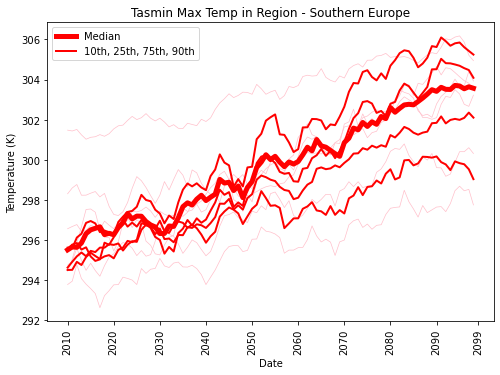

In [7]:
plot_tasmin_max_temp_meta_plot(analysis, 'Southern Europe')

In [8]:
def plot_tasmin_num_days_meta_plot(df, region):
    df_subset = df[df['region'] == region]
    # carib = analysis[analysis.region == 'Caribbean']
    ax = plot_meta_plot(df_subset, 'tasmin_num_days')

    ax.set(ylabel='Number of days above Tasmin', title=f'Tasmin Num Days in Region - {region}')
    plt.savefig(f'tasmin_num_days in {region}')
    plt.show()

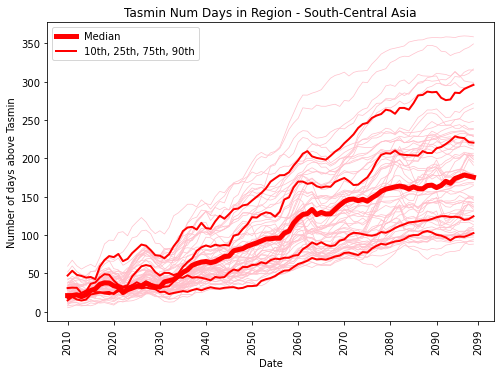

In [9]:
plot_tasmin_num_days_meta_plot(analysis, 'South-Central Asia')

In [10]:
def plot_tasmax_num_days_meta_plot(df, region):
    df_subset = df[df['region'] == region]
    ax = plot_meta_plot(df_subset, 'tasmax_num_days')
    
    ax.set(ylabel='Num days', title=f'Tasmax Num Days in Region - {region}')
    plt.savefig(f'tasmax_num_days in {region}')
    plt.show()

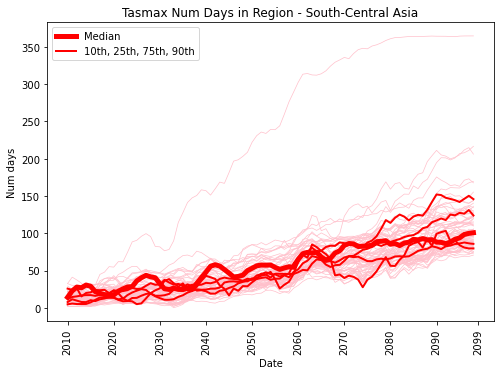

In [11]:
plot_tasmax_num_days_meta_plot(analysis, 'South-Central Asia')

In [12]:
def plot_tasmax_max_temp_meta_plot(df, region):
    df_subset = df[df['region'] == region]
    ax = plot_meta_plot(df_subset, 'tasmax_max_temp')
    
    ax.set(ylabel='Temperature (K)', title=f'Tasmax Max Temp in Region - {region}')
    plt.savefig(f'tasmax_max_temp in {region}')
    plt.show()

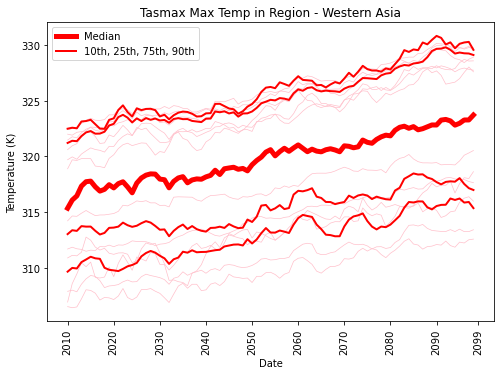

In [13]:
plot_tasmax_max_temp_meta_plot(analysis, 'Western Asia')

In [14]:
regions_of_cities = np.unique(analysis.region)
regions_of_cities

array(['Caribbean', 'Central America', 'Eastern Africa', 'Eastern Asia',
       'Eastern Europe', 'Melanesia', 'Middle Africa', 'Northern Africa',
       'Northern America', 'Northern Europe', 'South America',
       'South-Central Asia', 'South-Eastern Asia', 'Southern Europe',
       'Western Africa', 'Western Asia', 'Western Europe'], dtype=object)

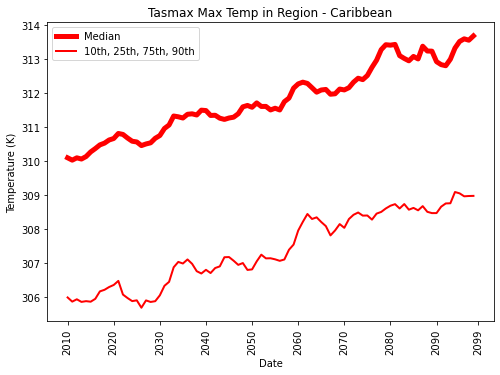

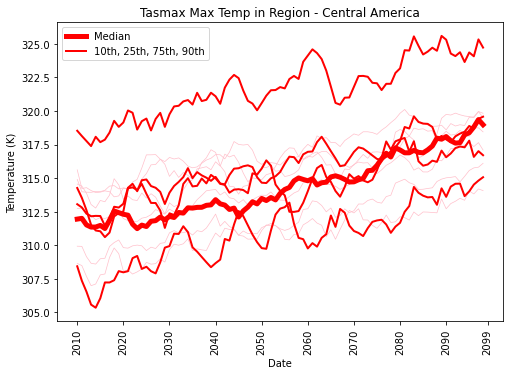

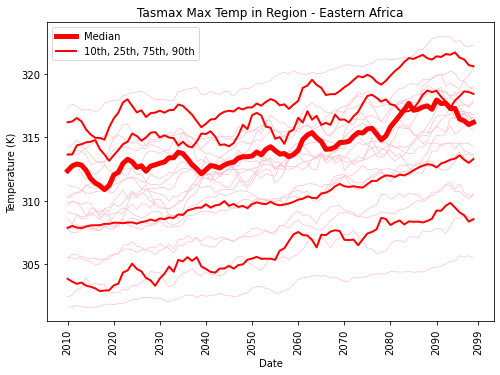

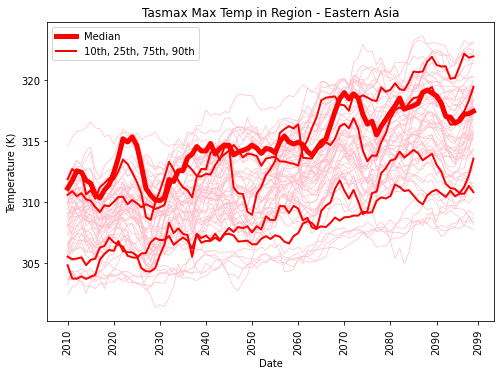

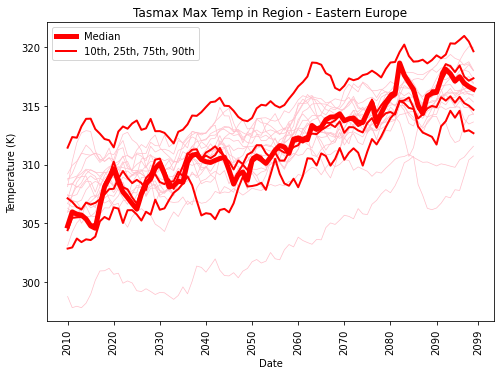

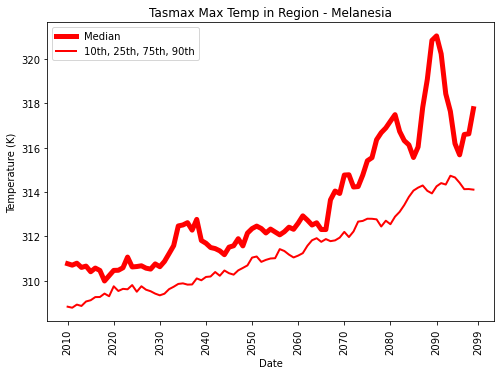

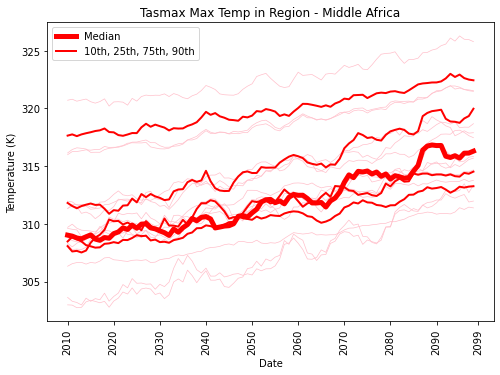

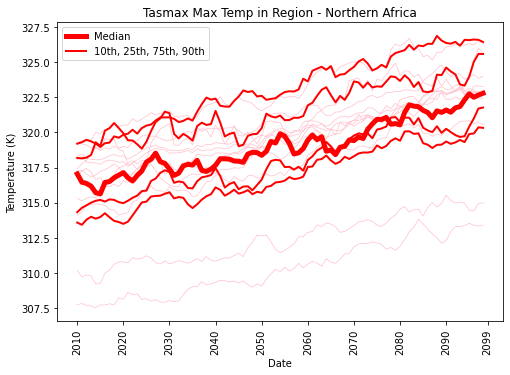

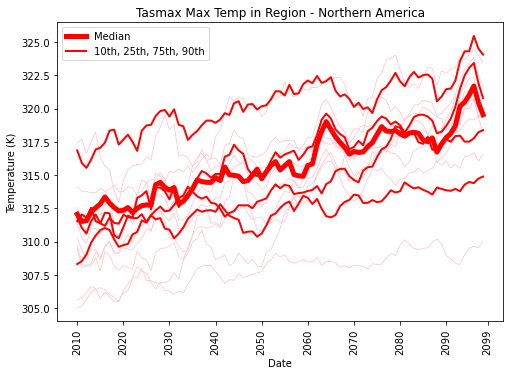

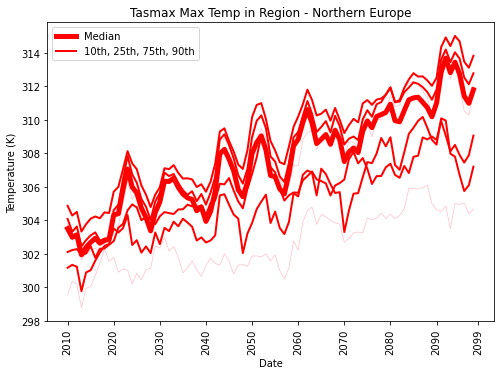

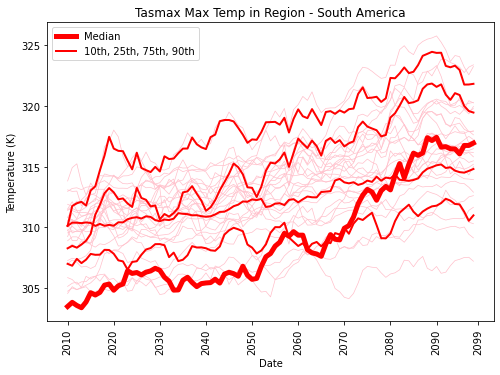

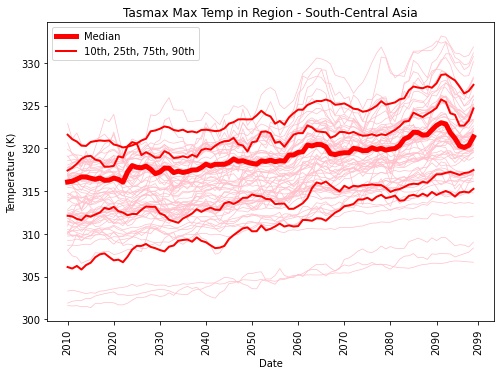

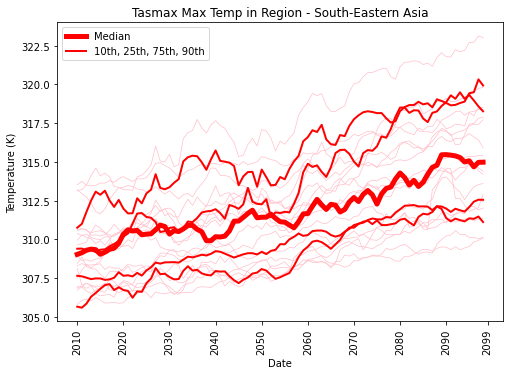

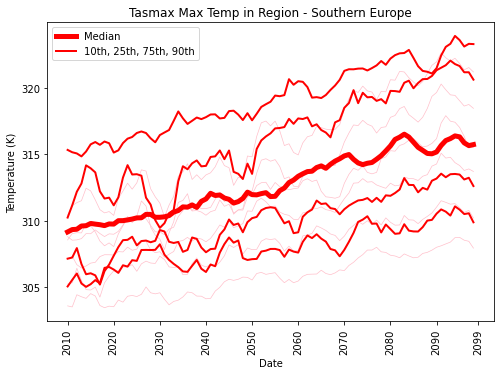

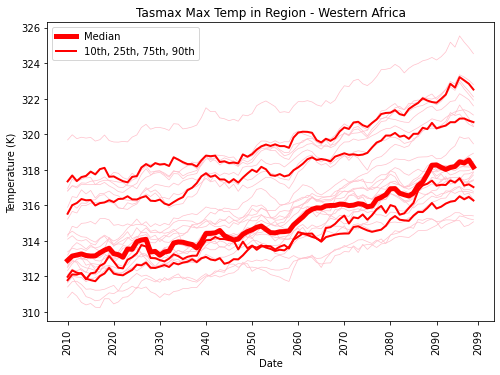

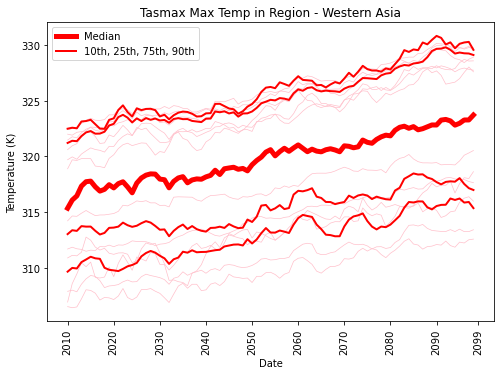

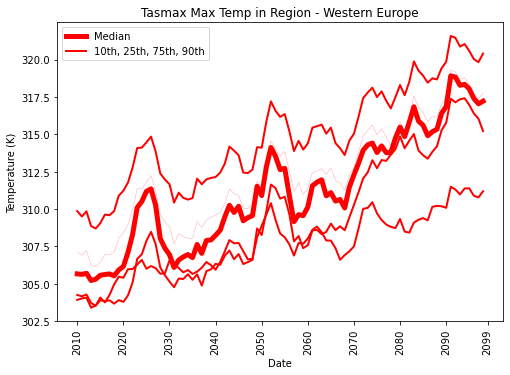

In [15]:
for r in regions_of_cities:
    plot_tasmax_max_temp_meta_plot(analysis, r)

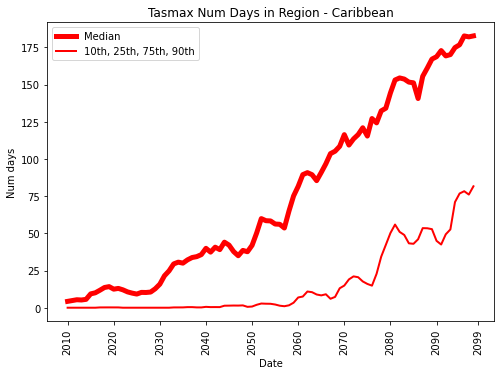

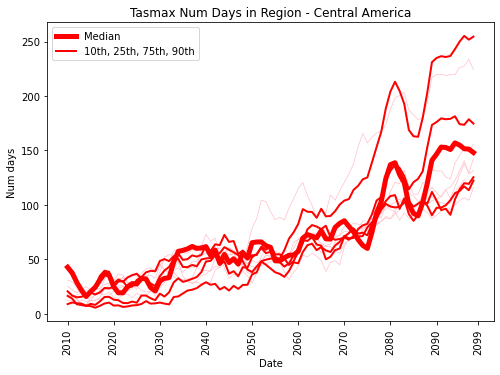

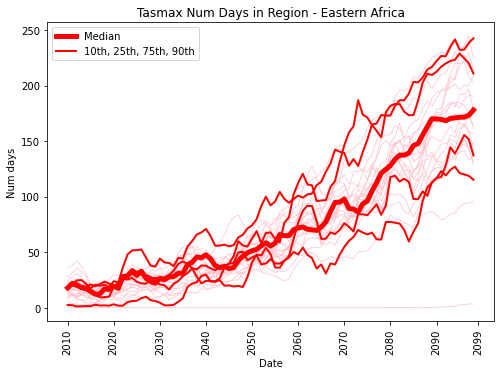

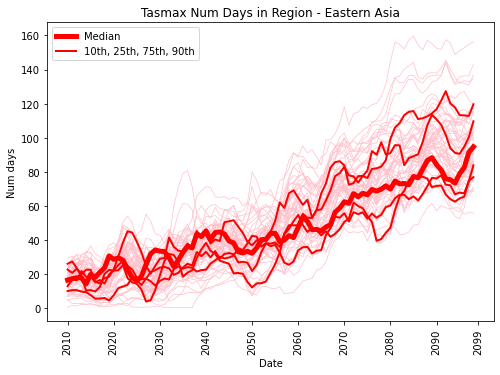

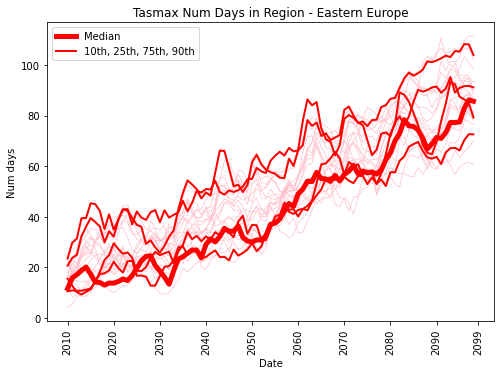

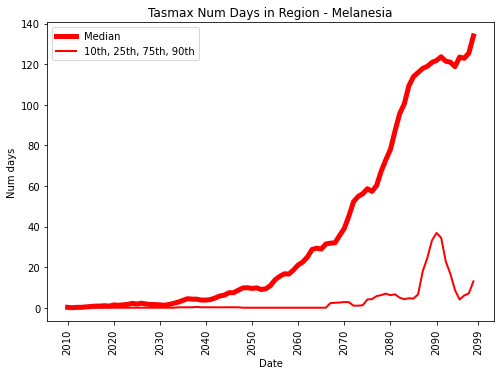

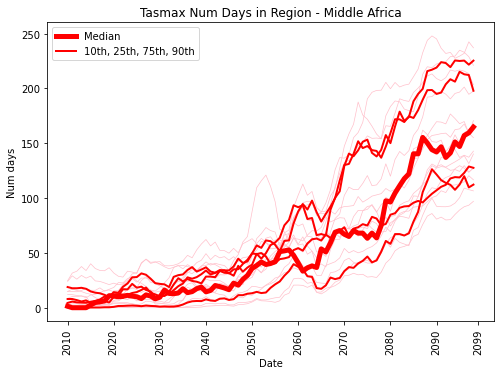

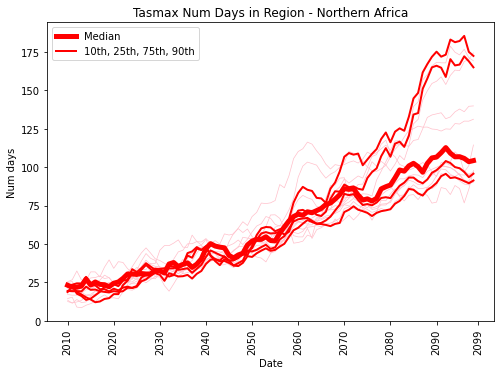

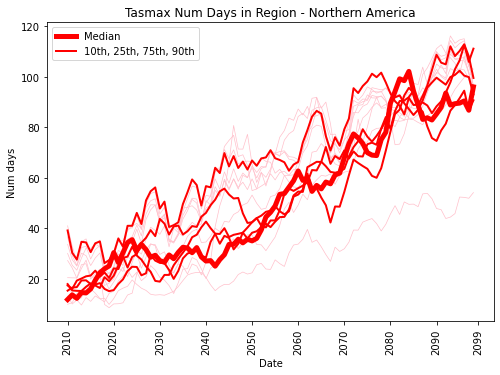

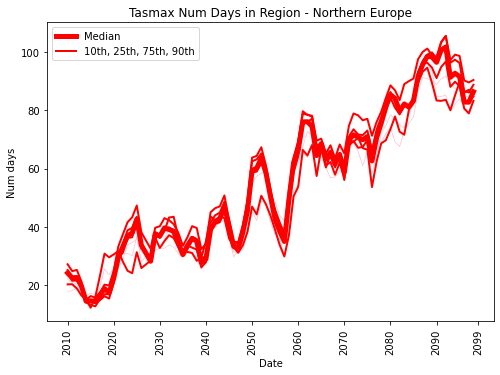

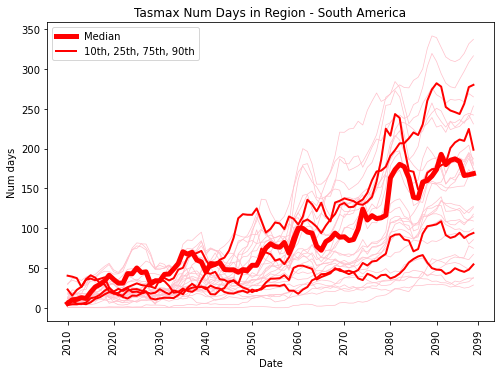

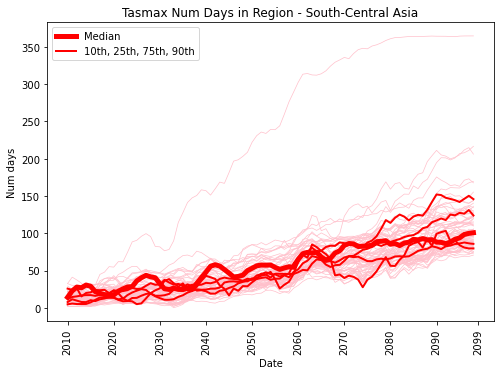

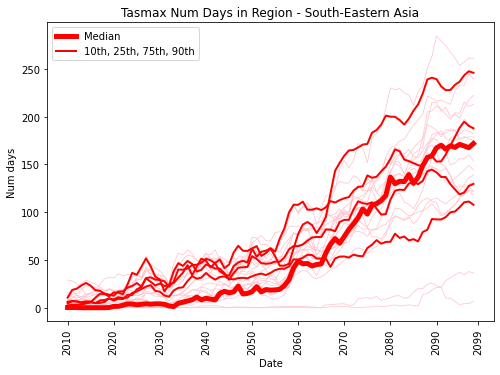

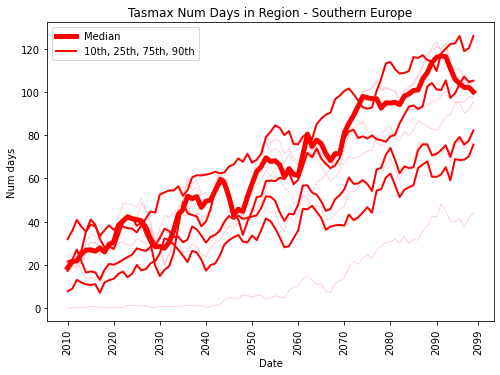

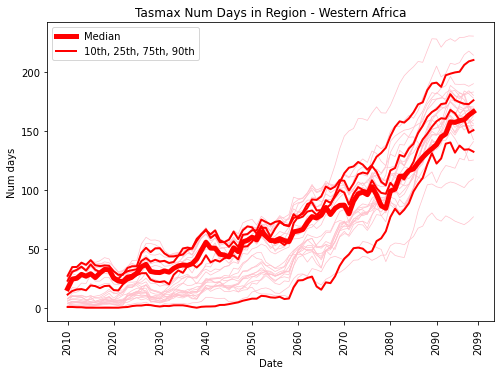

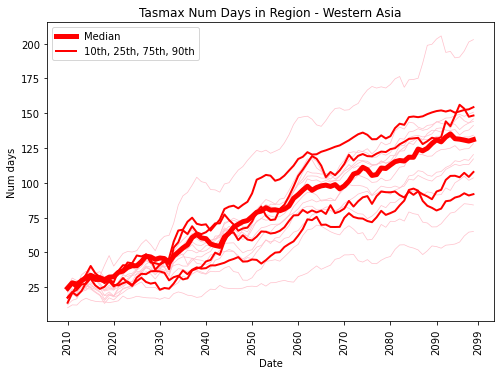

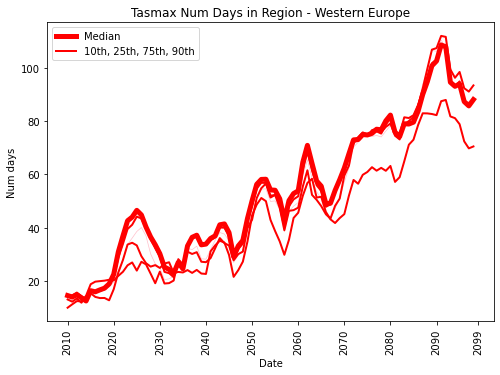

In [16]:
for r in regions_of_cities:
    plot_tasmax_num_days_meta_plot(analysis, r)

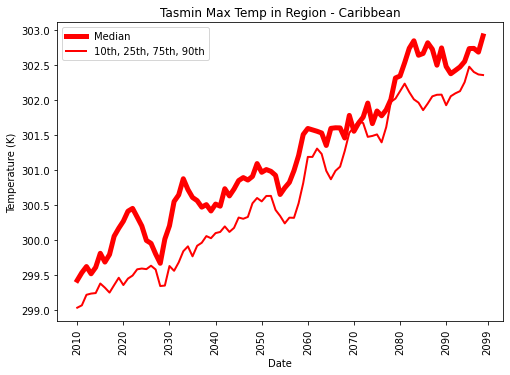

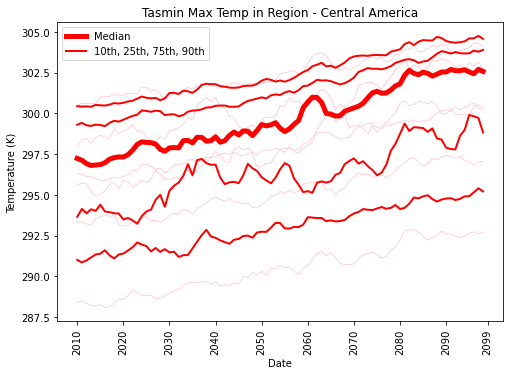

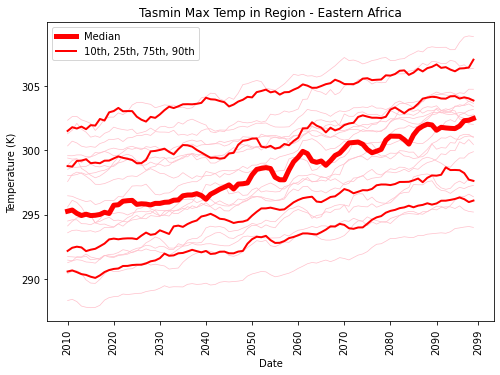

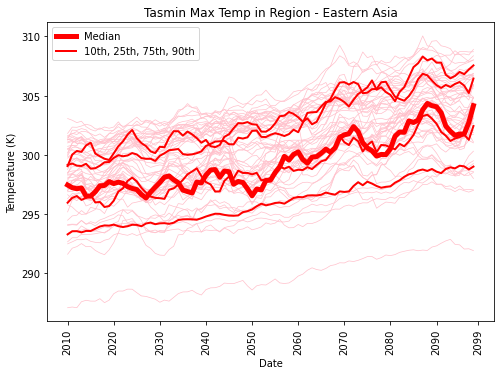

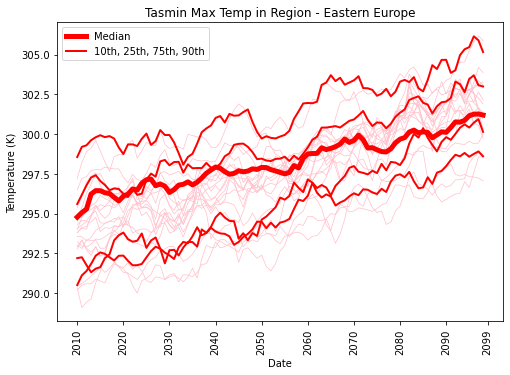

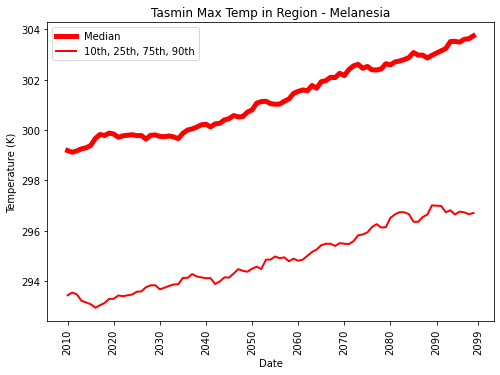

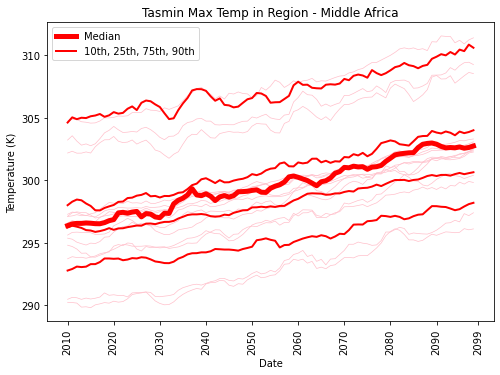

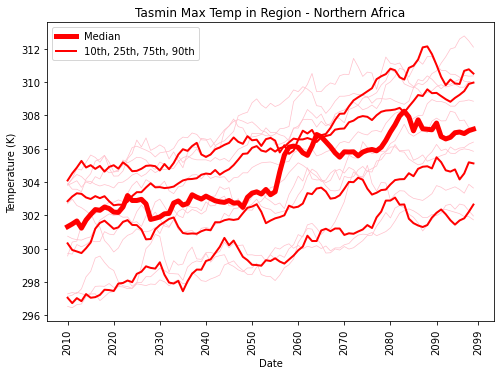

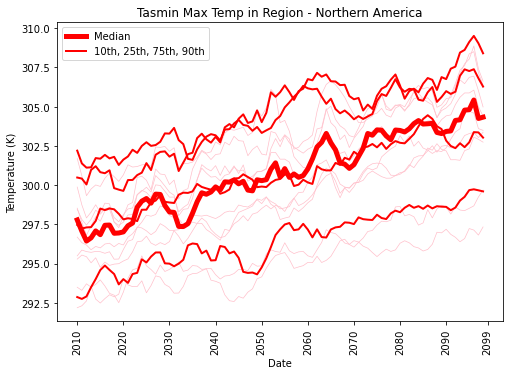

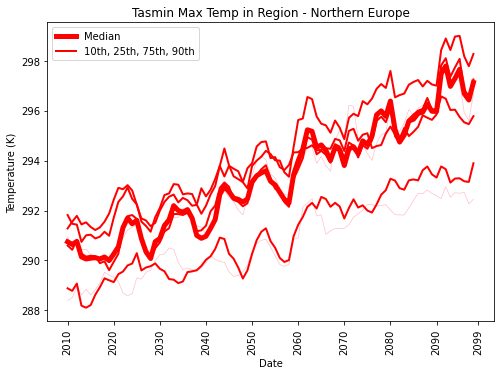

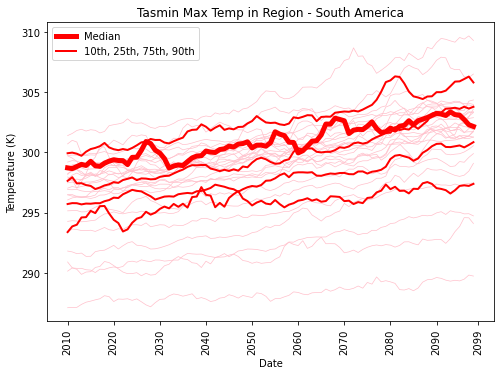

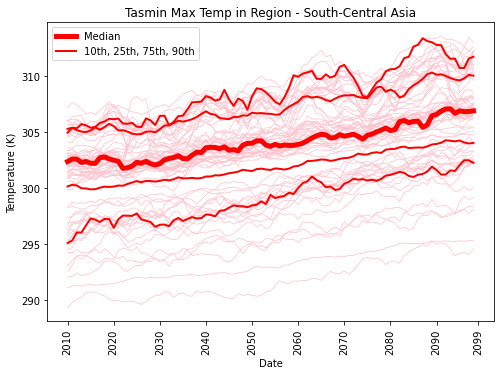

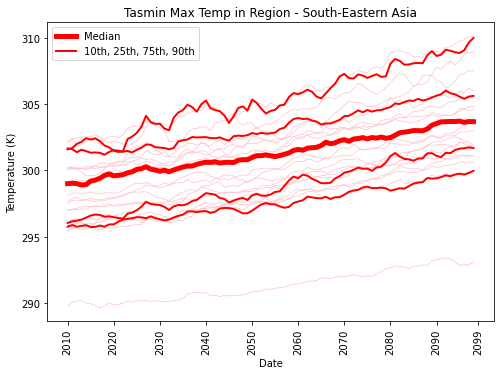

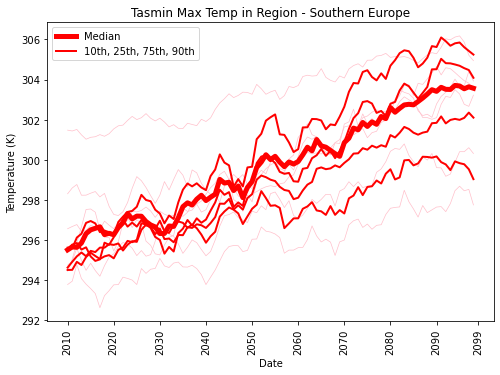

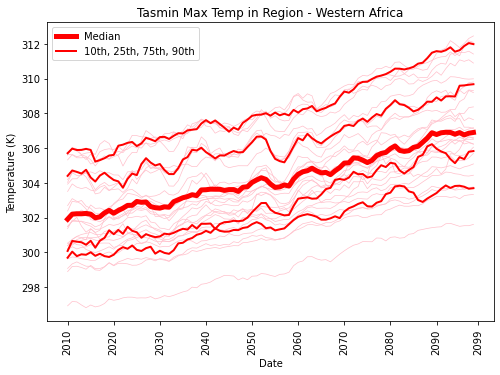

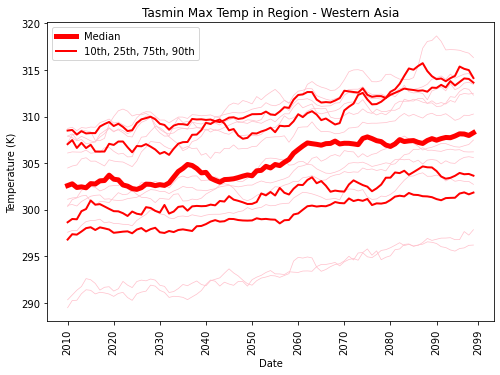

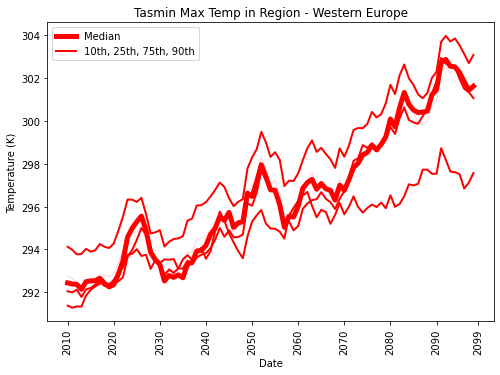

In [17]:
for r in regions_of_cities:
    plot_tasmin_max_temp_meta_plot(analysis, r)

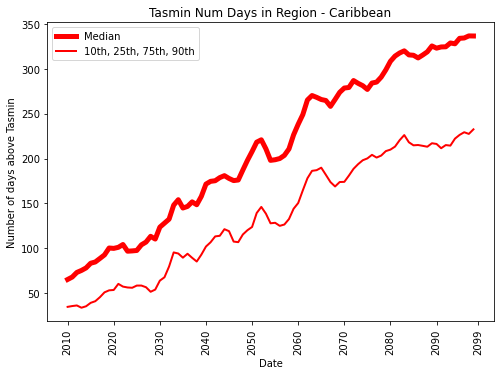

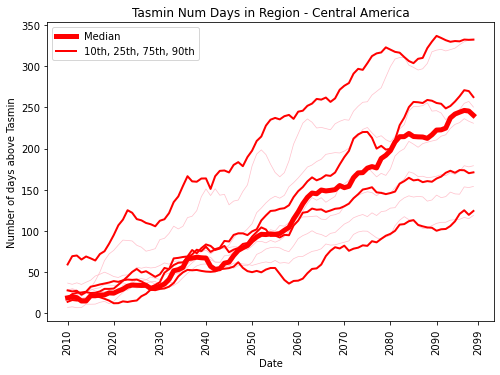

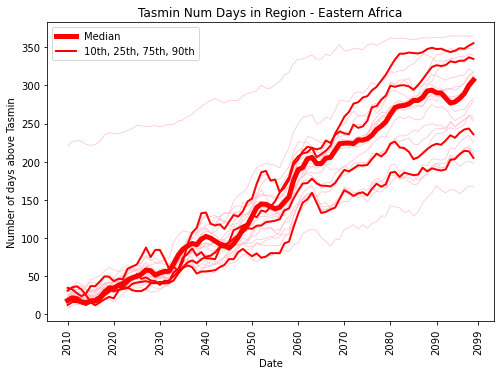

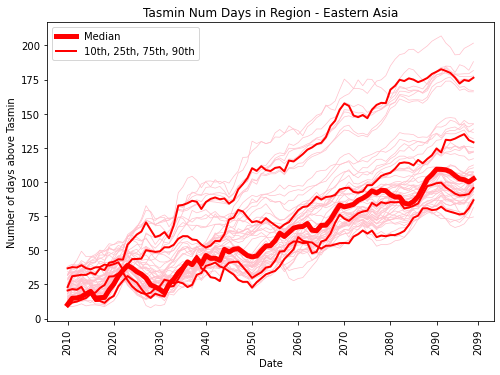

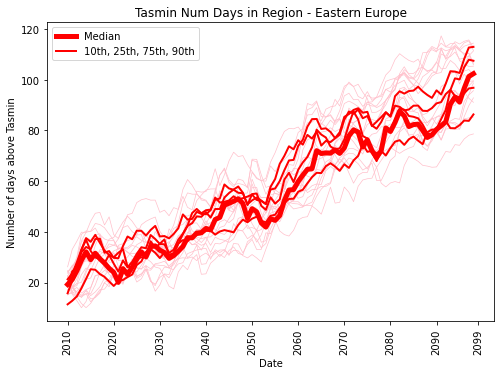

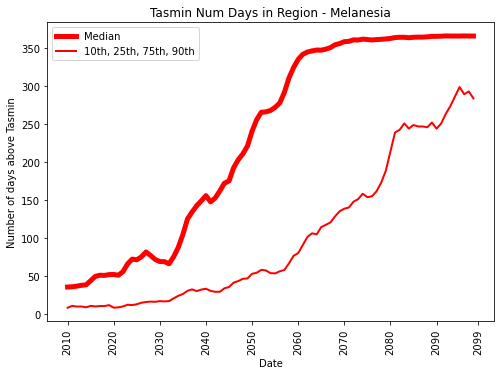

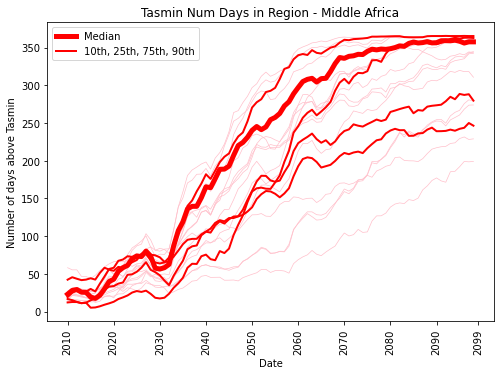

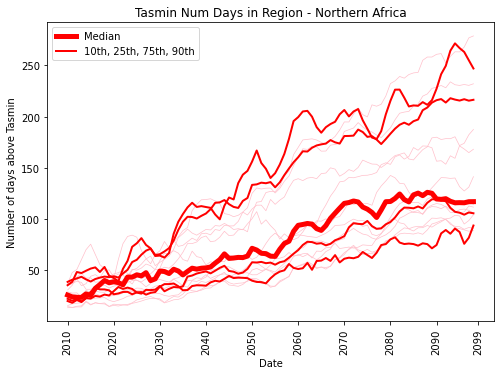

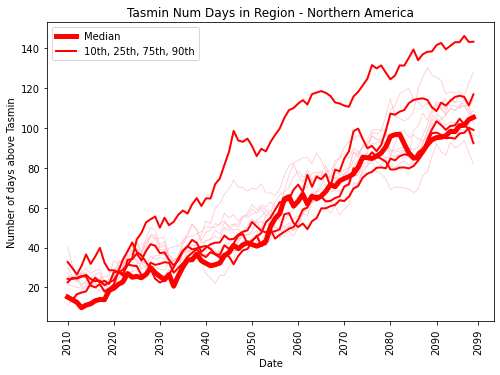

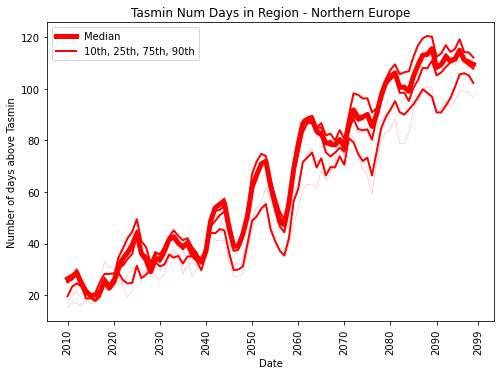

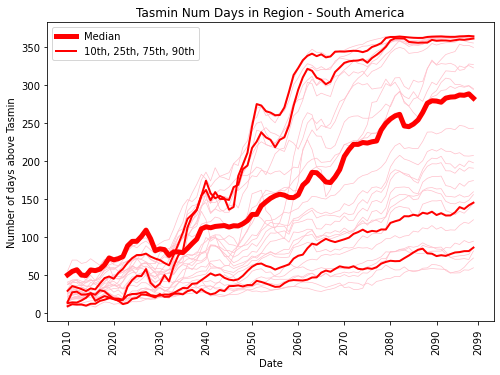

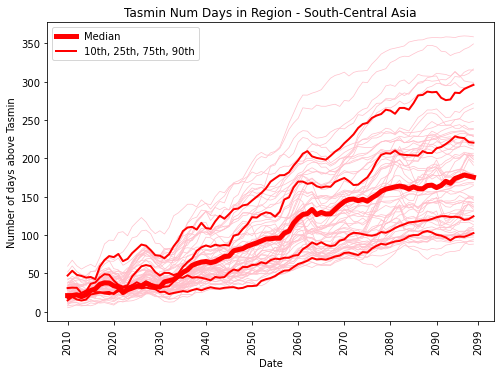

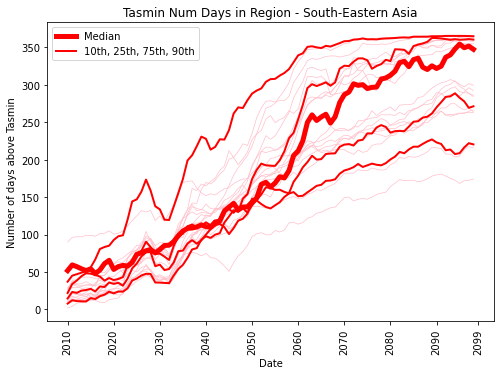

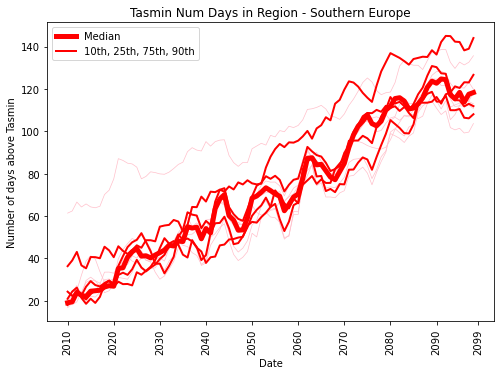

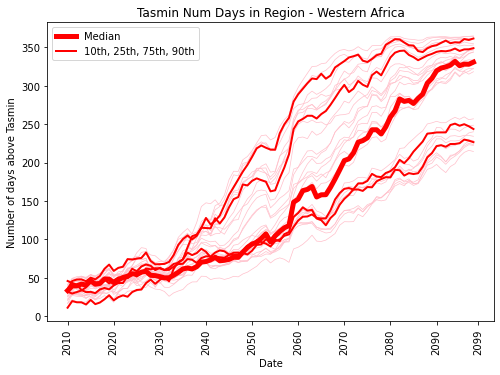

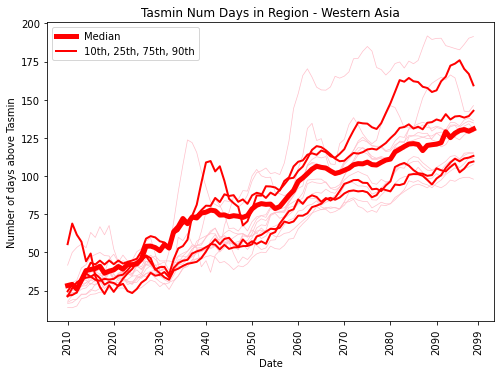

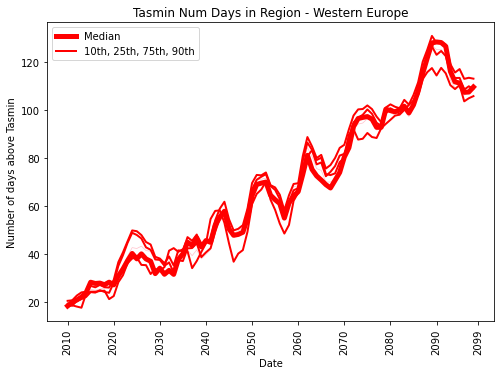

In [18]:
for r in regions_of_cities:
    plot_tasmin_num_days_meta_plot(analysis, r)